In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import models

In [2]:
tensor = torch.rand(4, 1)
print(tensor)

tensor([[0.9075],
        [0.8025],
        [0.3181],
        [0.6718]])


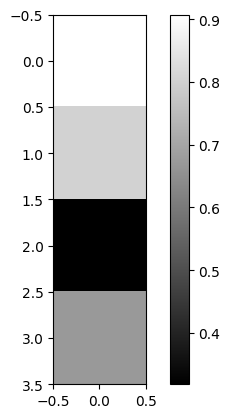

In [3]:
plt.imshow(tensor, cmap='gray')
plt.colorbar()
plt.show()

In [4]:
tensor.size()

torch.Size([4, 1])

In [5]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [6]:
resnet = models.resnet101(pretrained=True)
print(resnet)

C:\ProgramData\anaconda3\envs\pytorch_learn\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\ProgramData\anaconda3\envs\pytorch_learn\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchvision import transforms

In [8]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [9]:
from PIL import Image

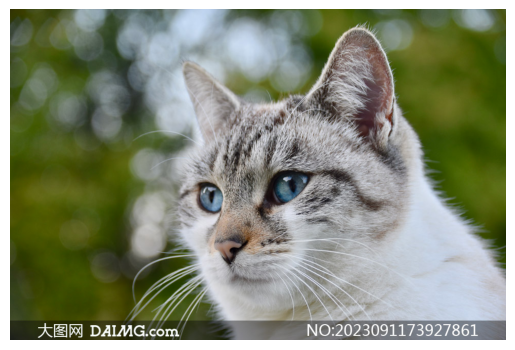

In [10]:
img = Image.open('3-230911144135.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
img_t = preprocess(img)

In [12]:
import torch
batch_t = torch.unsqueeze(img_t, dim=0)

In [13]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
out = resnet(batch_t)
out

tensor([[-2.5165e+00, -1.3788e+00, -1.4480e+00, -5.7860e-01, -1.3335e+00,
         -1.7469e+00, -1.1414e+00, -2.0170e+00, -2.3468e-01, -8.7658e-01,
          3.0644e-01, -1.1561e+00,  1.0426e+00, -1.0059e+00,  7.3213e-02,
          2.2269e+00, -5.5861e-02,  1.2977e+00, -9.5048e-02, -2.0552e+00,
          1.3981e+00, -1.3524e-01, -4.3021e-02,  7.1549e-01,  3.6471e+00,
         -1.9156e+00,  7.3088e-01,  1.3439e-01, -2.1309e+00, -1.8218e+00,
          2.1251e+00,  8.4804e-01,  8.2284e-02, -2.4014e+00, -2.7010e+00,
          1.6900e-01,  7.0069e-01, -6.6907e-02,  1.9350e+00,  1.6707e+00,
         -9.8382e-02,  3.8057e+00, -4.2403e-01, -9.8940e-01,  2.1183e+00,
         -1.6407e+00,  2.3797e+00, -6.0365e-01, -8.4394e-01, -1.9129e-01,
          3.7546e-01,  4.1115e-01,  7.3251e-01,  1.4022e+00,  1.1524e-01,
          1.9656e-01, -8.4030e-01,  8.9353e-01,  7.9571e-01,  1.8445e+00,
          8.2612e-01, -1.3855e+00,  4.6501e-01, -2.4037e+00, -1.1978e+00,
         -1.8684e+00,  1.6199e+00, -2.